## Part I  Introduction/Business Problem

The question that I would like to leverage the Foursquare location data to solve is about categorizing and identifying neighborhoods by amenities, events and activities within a neighborhood.

Daniel Silver, Terry Nichols Clark and Clemente Navarro (2007) raised a concept “Scene”, which represents a place with the meanings expressed by the people and practices there, to help analyze social characteristics of places. In their theory, a "Scene", is constructed by physical structure, persons and activities together, can be analyzed under 15 dimensions, such as "Legitimacy", "Traditionalistic","Self-Expressive","Glamorous" etc. A “scene” with high scores in specific cultural characteristics can attract the in-flow of the population that feel afﬁliated to corresponding cultural characteristics and cultivate a cultural environment which encourage corresponding values such as creativity/innovation/cautiousness/etc thus influencing the social and economical performance in an area. For example, when artists locate in more self-expressive, glamorous, and charismatic scene,general economic growth are stronger (Silver and Clark 2016). 

The framework behind the "Scene" theory, which categorizes different places by their cultural dimensions and examine how places of different categories affect social and economical performance, is a interesting and useful method. However, the 15 cultural dimensions which are used to categorize places seems so heavily based on hypothesis and theory that it seems sort of arbitrary, thus having some weakness in emprical evidence. Therefore, inspired by the week 3 segmenting and clustering project, I would like to try machine learning categorization algorithemes to provide a new perspective on neighborhoods categorizing and help understand their social characteristics, based on activities and amenities data in neighborhoods.

## Part II Data Description 

For amenities data, I will leverage the Foursquare API to access venues information in neighborhoods. 

For activities data, I will employ the data from Meetup.com website. Meetup is an online platform with more than 40 millionusers,320,000 active groups, and an average 12,000 events each day that allows participants to connect with people in their geographic area through public events (Meetup.com).It is a so-called “Event Based Social Network” (EBSN), which allows users to find and join groups unified by a common interest and participate the events held by these groups. Meetup API allows any registered user to request for and store the information (including precise date, time, geography coordinate, host group, category, description, the number ofattendees,rate etc.) of Meetup events that happen within a certain distance from cities. For this project, in order to simplify the data collecting process, I plan to use the Meetup dataset on Kaggle (https://www.kaggle.com/ruosiwang/meetup), which was originally collected through Meetup API.

The following is the summary of the preprocessed version of the Meetup dataset from Kaggle.In order to analyze this dataset more conveniently in python, I have done some data preprocessing and cleaning, which includes converting the dataset format to csv, deleting irrelevant variables, filtering only the events that happened in Chicago, substituting the missing value with its previous row in the dataset(Since the rows in Meetup dataset are clustered by locations, which means the rows of events that happened in one district are near each other, it’s reasonable to replace the missing values (NA) in the dataset with the most recent non-NA value in the same column.) etc. The details of my data preprocessing are displayed in the code part.

In [1]:
import pandas as pd
df=pd.read_csv(r'D:\meetup\chicagoevents.csv')
df=df.drop(columns='Unnamed: 0')

In [2]:
df.head()

,id,name,lon,lat,year,category,part_size,group_name,venue.name,venue.address_1,zipcode,citym,statem,supercat
0,250586545,AWS Community Day in Chicago,-87.63,41.88,2018,tech,1,AWS_MN,Morningstar,22 West Washington Street,60603,Chicago,IL,learning&career
1,221660972,Freeze vs Columbus,-87.64,41.95,2015,fitness,32,Minnesota Freeze Australian Rules Football Clu...,Waveland Field,3600 N Recreation Dr,60613,Chicago,IL,health&wellbeing
2,243360022,Brand Strategy Conference,-87.63,41.89,2017,tech,1,Ansir Innovation Center,Wyndham Chicago Grand Riverfront,71 East Wacker Dr.,60654,Chicago,IL,learning&career
3,160249252,May 2014 Chicago Meetup,-87.62,41.90,2014,career/business,46,Online Lending,The Ritz Carlton Chicago,160 E Pearson St,60611,Chicago,IL,learning&career
4,229097913,Marketing Automation Training - Early Registra...,-87.62,41.89,2016,socializing,0,Fun Times for New York Professionals on Their ...,University of Chicago Booth School of Business...,450 North Cityfront Plaza Drive,60611,Chicago,IL,networking


This dataset contains 122164 Meetup events in Chicago during 2011 to 2018 August. 

In [3]:
df.describe(include="all")

,id,name,lon,lat,year,category,part_size,group_name,venue.name,venue.address_1,zipcode,citym,statem,supercat
count,122164,122163,122164.000000,122164.000000,122164.000000,122164,122164.000000,122164,122164,122163,122164.000000,122164,122164,122164
unique,122164,58791,NaN,NaN,NaN,33,NaN,1805,9668,10418,NaN,1,1,6
top,dszfmmywfbdc,RISE TO THE CHALLENGE: THE RISE FITNESS BOOT CAMP,NaN,NaN,NaN,socializing,NaN,"Chicago Horror Meetup Group (Movies, Books, Et...",Chicago Futsal Academy,6122 N. Clark Street,NaN,Chicago,IL,hobby&recreation
freq,1,530,NaN,NaN,NaN,14512,NaN,1845,1002,1002,NaN,122164,122164,43788
mean,NaN,NaN,-87.655132,41.910542,2015.302413,NaN,13.051374,NaN,NaN,NaN,60625.957238,NaN,NaN,NaN
std,NaN,NaN,0.032182,0.047311,1.858103,NaN,24.195204,NaN,NaN,NaN,18.740297,NaN,NaN,NaN
min,NaN,NaN,-87.850000,41.630000,2011.000000,NaN,0.000000,NaN,NaN,NaN,60601.000000,NaN,NaN,NaN
25%,NaN,NaN,-87.670000,41.880000,2014.000000,NaN,2.000000,NaN,NaN,NaN,60610.000000,NaN,NaN,NaN
50%,NaN,NaN,-87.650000,41.910000,2015.000000,NaN,6.000000,NaN,NaN,NaN,60618.000000,NaN,NaN,NaN
75%,NaN,NaN,-87.630000,41.940000,2017.000000,NaN,14.000000,NaN,NaN,NaN,60642.000000,NaN,NaN,NaN


## Part III Methodology

First, Let's have a basic impression of the distribution of Meetup events in Chicago by the spatial density plot of Meetup event locations.

In [4]:
import matplotlib
import matplotlib.pyplot as plt

In [5]:
import numpy as np

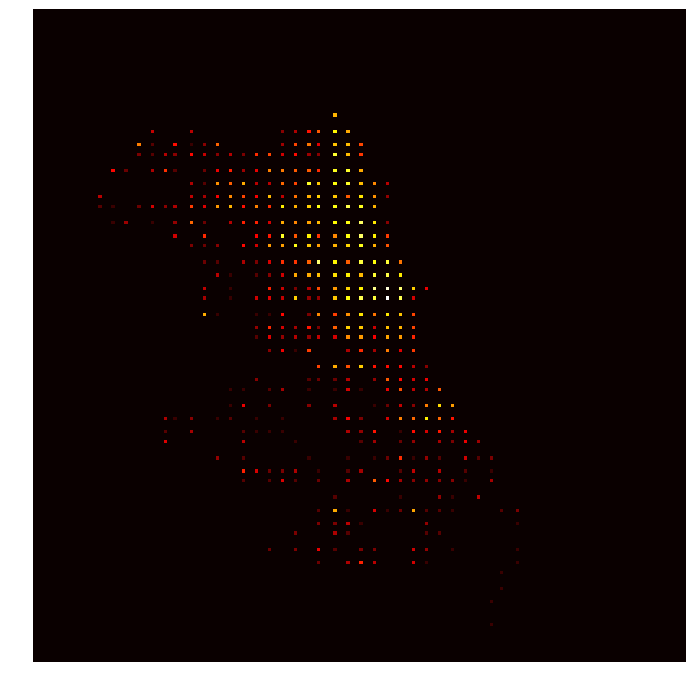

In [6]:
# show the log density of Meetup event locations
allLat  = np.array(df['lat'])
allLong = np.array(df['lon'])

imageSize = (200,200)
longRange = [-87.9,-87.4]
latRange = [41.6,42.1]

allLatInds  = imageSize[0] - (imageSize[0] * (allLat  - latRange[0])  / (latRange[1]  - latRange[0]) ).astype(int)
allLongInds =                (imageSize[1] * (allLong - longRange[0]) / (longRange[1] - longRange[0])).astype(int)

locationDensityImage = np.zeros(imageSize)
for latInd, longInd in zip(allLatInds,allLongInds):
    locationDensityImage[latInd,longInd] += 1

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,12))
ax.imshow(np.log(locationDensityImage+1),cmap='hot')
ax.set_axis_off()

From the graph above, we can see that mainly the middle and north parts that are near lake shoreline have the most frequent Meetup events, which have much overlapping with the most wealthy neighborhoods and Chicago downtown, such as Navy Pier, Niver North, Golden Coast etc.

Then we import our Chicago zipcode dataset, which includes the geographical coordinates of the zipcode. (This zipcode dataset comes from a R package "zipcode" .) For the relevance of our analysis, let's just reserve the zipcode areas that contain Meetup events and discard the rest ones. There are 53 zipcode areas left in the dataset.

In [24]:
zipcode=pd.read_csv(r"D:/meetup/chicagozip.csv")
zipcode.drop(columns="Unnamed: 0",inplace=True)

In [25]:
zipcode.head()

,zip,city,state,latitude,longitude
0,60290,Chicago,IL,41.850000,-87.65000
1,60601,Chicago,IL,41.886456,-87.62325
2,60602,Chicago,IL,41.882937,-87.62874
3,60603,Chicago,IL,41.880446,-87.63014
4,60604,Chicago,IL,41.877589,-87.62818


In [31]:
zipcode_uni=pd.DataFrame(df["zipcode"].unique())
zipcode_uni.columns=['zip']

In [36]:
zipcode=pd.merge(zipcode,zipcode_uni,on='zip',how='inner')

In [10]:
import folium

In [38]:
map_chicago = folium.Map(location=[41.8781,-87.6298], zoom_start=10)

# add markers to map
for lat, lng, zipc in zip(zipcode['latitude'], zipcode['longitude'], zipcode['zip']):
    label = '{}'.format(zipc)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

<img src="chicagomap.PNG">

In [43]:
import requests

### Explore the nearby venues of each zipcode area with Foursquare API 

In [66]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT=50):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['zipcode', 
                  'zipcode latitude', 
                  'zipcode longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [67]:
chicago_venues = getNearbyVenues(names=zipcode['zip'],
                                   latitudes=zipcode['latitude'],
                                   longitudes=zipcode['longitude']
                                  )

60601
60603
60605
60607
60608
60609
60610
60611
60612
60613
60614
60615
60616
60617
60618
60619
60620
60621
60622
60623
60624
60625
60626
60628
60629
60630
60631
60632
60633
60634
60636
60637
60638
60639
60640
60641
60642
60643
60644
60645
60646
60647
60649
60651
60652
60653
60654
60655
60656
60657
60659
60660
60661


Finally, we got 1075 venues in 53 zipcode areas.In order to be able to cluster the zipcode areas by their nearby venues and events, we need to spread the venue categories and event categories to the column names and regard them as the charateristics of a zipcode area.

In [68]:
chicago_venues

,zipcode,zipcode latitude,zipcode longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,60601,41.886456,-87.62325,Chicago Architecture Center,41.887720,-87.623650,Tour Provider
1,60601,41.886456,-87.62325,Roti Modern Mediterranean,41.885900,-87.624945,Mediterranean Restaurant
2,60601,41.886456,-87.62325,sweetgreen,41.884964,-87.624728,Salad Place
3,60601,41.886456,-87.62325,Giordano's,41.885130,-87.623761,Pizza Place
4,60601,41.886456,-87.62325,St. Jane Chicago,41.886573,-87.624902,Hotel
5,60601,41.886456,-87.62325,Virgin Hotels Chicago,41.886065,-87.625853,Hotel
6,60601,41.886456,-87.62325,DAVIDsTEA,41.885033,-87.624511,Tea Room
7,60601,41.886456,-87.62325,Naf Naf Grill,41.887618,-87.624505,Middle Eastern Restaurant
8,60601,41.886456,-87.62325,Garrett Popcorn Shops - Millennium Park Plaza,41.884854,-87.624499,Snack Place
9,60601,41.886456,-87.62325,London House Chicago by Hilton,41.887832,-87.625426,Hotel


In [84]:
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")
chicago_onehot['zipcode'] = chicago_venues['zipcode'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_onehot.head()

,zipcode,ATM,Adult Boutique,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,...,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,60601,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60601,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60601,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60601,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60601,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
chicago_onehot2 = pd.get_dummies(df[['category']], prefix="", prefix_sep="")
chicago_onehot2['zipcode'] = df['zipcode'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot2.columns[-1]] + list(chicago_onehot2.columns[:-1])
chicago_onehot2 = chicago_onehot2[fixed_columns]

chicago_onehot2.head()

,zipcode,LGBT,alternative lifestyle,book clubs,career/business,cars/motorcycles,community/environment,dancing,education/learning,fashion/beauty,...,pets/animals,photography,religion/beliefs,sci-fi/fantasy,singles,socializing,sports/recreation,support,tech,writing
0,60603,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,60613,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60654,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,60611,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60611,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


The following step is to get the ratio of nearby venues and events of different categories compared to the whole sample, as ratios are more helpful to tell the preference of each zipcode area than the absolute number of venues and events. 

In [89]:
chicago_grouped1 = chicago_onehot.groupby('zipcode').mean().reset_index()
chicago_grouped1

,zipcode,ATM,Adult Boutique,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,...,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,60601,0.000000,0.000000,0.00000,0.000000,0.020000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.00,0.02,0.00,0.000000,0.000000,0.00,0.00,0.000000
1,60603,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.02,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000
2,60605,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000
3,60607,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000
4,60608,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.066667,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000
5,60609,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000
6,60610,0.000000,0.000000,0.02439,0.000000,0.048780,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.048780
7,60611,0.000000,0.000000,0.00000,0.000000,0.040000,0.00,0.020000,0.00,0.00,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.02,0.040000
8,60612,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000
9,60613,0.000000,0.000000,0.00000,0.000000,0.030303,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.00,0.00,0.00,0.030303,0.030303,0.00,0.00,0.030303


In [90]:
chicago_grouped2 = chicago_onehot2.groupby('zipcode').mean().reset_index()
chicago_grouped2

,zipcode,LGBT,alternative lifestyle,book clubs,career/business,cars/motorcycles,community/environment,dancing,education/learning,fashion/beauty,...,pets/animals,photography,religion/beliefs,sci-fi/fantasy,singles,socializing,sports/recreation,support,tech,writing
0,60601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.062500,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
1,60603,0.007075,0.000612,0.012178,0.166746,0.001293,0.007211,0.003266,0.017076,0.017756,...,0.000476,0.004082,0.029186,0.002857,0.051160,0.071978,0.007075,0.003402,0.160759,0.007960
2,60605,0.012864,0.000000,0.009479,0.089370,0.004739,0.015572,0.013541,0.033175,0.001354,...,0.001354,0.039946,0.060934,0.008802,0.027082,0.165877,0.022343,0.002031,0.084631,0.003385
3,60607,0.002278,0.000000,0.002485,0.061503,0.003727,0.003106,0.010354,0.007041,0.008076,...,0.003727,0.000621,0.000207,0.000207,0.015531,0.095465,0.122179,0.009526,0.130462,0.006834
4,60608,0.001581,0.000000,0.004215,0.090622,0.004215,0.008957,0.002634,0.003161,0.001581,...,0.002107,0.001581,0.000000,0.000000,0.012118,0.060590,0.051633,0.001054,0.268704,0.002634
5,60609,0.025019,0.000000,0.000000,0.011372,0.000000,0.018954,0.000000,0.035633,0.007582,...,0.005307,0.000758,0.000000,0.000000,0.006065,0.081122,0.094769,0.000000,0.197877,0.000000
6,60610,0.001943,0.000000,0.013742,0.114659,0.000278,0.003054,0.001805,0.061216,0.004026,...,0.003470,0.000555,0.000000,0.000694,0.013326,0.205303,0.125208,0.000416,0.119239,0.011521
7,60611,0.006608,0.000000,0.021317,0.071200,0.001705,0.008101,0.001919,0.074185,0.002771,...,0.001705,0.001492,0.001919,0.002771,0.022383,0.127052,0.026860,0.000853,0.124281,0.004690
8,60612,0.016801,0.000000,0.000000,0.016801,0.004032,0.037634,0.000672,0.000672,0.002688,...,0.005376,0.000000,0.000000,0.000000,0.178091,0.134409,0.120968,0.393145,0.011425,0.000672
9,60613,0.098957,0.000000,0.002086,0.010581,0.001490,0.004024,0.001043,0.004769,0.000447,...,0.010581,0.086587,0.000149,0.012072,0.006408,0.123994,0.098212,0.003875,0.030551,0.000894


In [95]:
chicago_grouped=pd.merge(chicago_grouped1,chicago_grouped2,on='zipcode',how='left')

In [96]:
chicago_grouped

,zipcode,ATM,Adult Boutique,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,...,pets/animals,photography,religion/beliefs,sci-fi/fantasy,singles,socializing,sports/recreation,support,tech,writing
0,60601,0.000000,0.000000,0.00000,0.000000,0.020000,0.00,0.000000,0.00,0.00,...,0.000000,0.062500,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
1,60603,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.02,...,0.000476,0.004082,0.029186,0.002857,0.051160,0.071978,0.007075,0.003402,0.160759,0.007960
2,60605,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.001354,0.039946,0.060934,0.008802,0.027082,0.165877,0.022343,0.002031,0.084631,0.003385
3,60607,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.003727,0.000621,0.000207,0.000207,0.015531,0.095465,0.122179,0.009526,0.130462,0.006834
4,60608,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.002107,0.001581,0.000000,0.000000,0.012118,0.060590,0.051633,0.001054,0.268704,0.002634
5,60609,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.005307,0.000758,0.000000,0.000000,0.006065,0.081122,0.094769,0.000000,0.197877,0.000000
6,60610,0.000000,0.000000,0.02439,0.000000,0.048780,0.00,0.000000,0.00,0.00,...,0.003470,0.000555,0.000000,0.000694,0.013326,0.205303,0.125208,0.000416,0.119239,0.011521
7,60611,0.000000,0.000000,0.00000,0.000000,0.040000,0.00,0.020000,0.00,0.00,...,0.001705,0.001492,0.001919,0.002771,0.022383,0.127052,0.026860,0.000853,0.124281,0.004690
8,60612,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.005376,0.000000,0.000000,0.000000,0.178091,0.134409,0.120968,0.393145,0.011425,0.000672
9,60613,0.000000,0.000000,0.00000,0.000000,0.030303,0.00,0.000000,0.00,0.00,...,0.010581,0.086587,0.000149,0.012072,0.006408,0.123994,0.098212,0.003875,0.030551,0.000894


To help us understand the typical venues and events of each zipcode area better, we can gather top 5 the most common venues and events respectively in each zipcode area.

In [78]:
def return_most_common(row, num_top):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top]

In [91]:
num_top = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['zipcode']
for ind in np.arange(num_top):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['zipcode'] = chicago_grouped1['zipcode']

for ind in np.arange(chicago_grouped1.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common(chicago_grouped1.iloc[ind, :], num_top)

venues_sorted.head()

,zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,60601,Hotel,Coffee Shop,Sandwich Place,Theater,Museum
1,60603,Hotel,Italian Restaurant,Coffee Shop,Public Art,Sandwich Place
2,60605,Football Stadium,Historic Site,Park,Athletics & Sports,Parking
3,60607,Greek Restaurant,Sandwich Place,Pizza Place,Coffee Shop,Café
4,60608,Grocery Store,Boat or Ferry,Dessert Shop,Pharmacy,Mexican Restaurant


In [93]:
columns=['zipcode']
for ind in np.arange(num_top):
    try:
        columns.append('{}{} Most Common Event'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Event'.format(ind+1))

# create a new dataframe
events_sorted = pd.DataFrame(columns=columns)
events_sorted['zipcode'] = chicago_grouped2['zipcode']

for ind in np.arange(chicago_grouped2.shape[0]):
    events_sorted.iloc[ind, 1:] = return_most_common(chicago_grouped2.iloc[ind, :], num_top)

events_sorted.head()

,zipcode,1st Most Common Event,2nd Most Common Event,3rd Most Common Event,4th Most Common Event,5th Most Common Event
0,60601,food/drink,socializing,paranormal,language/ethnic identity,photography
1,60603,career/business,tech,health/wellbeing,language/ethnic identity,socializing
2,60605,socializing,career/business,tech,fitness,religion/beliefs
3,60607,health/wellbeing,tech,sports/recreation,parents/family,socializing
4,60608,tech,games,language/ethnic identity,career/business,socializing


In [94]:
zip_venue_event=pd.merge(venues_sorted,events_sorted,on='zipcode',how='left')
zip_venue_event

,zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,1st Most Common Event,2nd Most Common Event,3rd Most Common Event,4th Most Common Event,5th Most Common Event
0,60601,Hotel,Coffee Shop,Sandwich Place,Theater,Museum,food/drink,socializing,paranormal,language/ethnic identity,photography
1,60603,Hotel,Italian Restaurant,Coffee Shop,Public Art,Sandwich Place,career/business,tech,health/wellbeing,language/ethnic identity,socializing
2,60605,Football Stadium,Historic Site,Park,Athletics & Sports,Parking,socializing,career/business,tech,fitness,religion/beliefs
3,60607,Greek Restaurant,Sandwich Place,Pizza Place,Coffee Shop,Café,health/wellbeing,tech,sports/recreation,parents/family,socializing
4,60608,Grocery Store,Boat or Ferry,Dessert Shop,Pharmacy,Mexican Restaurant,tech,games,language/ethnic identity,career/business,socializing
5,60609,Pizza Place,Spanish Restaurant,Yoga Studio,Dog Run,Farmers Market,tech,hobbies/crafts,language/ethnic identity,sports/recreation,socializing
6,60610,Coffee Shop,Yoga Studio,Bar,Italian Restaurant,Fast Food Restaurant,socializing,sports/recreation,tech,career/business,health/wellbeing
7,60611,Italian Restaurant,Café,Restaurant,Steakhouse,Hotel,language/ethnic identity,socializing,tech,education/learning,career/business
8,60612,Sandwich Place,Chinese Restaurant,Gas Station,Fast Food Restaurant,Boutique,support,singles,socializing,sports/recreation,community/environment
9,60613,Pizza Place,Bus Station,Salon / Barbershop,Dive Bar,New American Restaurant,health/wellbeing,socializing,LGBT,sports/recreation,movies/film


## Part IV Results

After trying to divide these zipcode areas into 2,3,4,5 clusters, I found that having 3 clusters seems to be the most reasonable, which gives the result that 46 zipcodes fall into the first cluster, 3 in the second cluster and 4 in the third cluster.

In [107]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 3

chicago_grouped_clustering = chicago_grouped.drop('zipcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [108]:
zip_venue_event.drop(columns='Cluster Labels',inplace=True)

In [109]:
# add clustering labels
zip_venue_event.insert(0, 'Cluster Labels', kmeans.labels_)

chicago_merged = zipcode

# merge to add latitude/longitude for each zipcode
chicago_merged =pd.merge(chicago_merged,zip_venue_event.set_index('zipcode'), left_on='zip',right_on='zipcode',how='inner')

chicago_merged

,zip,city,state,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,1st Most Common Event,2nd Most Common Event,3rd Most Common Event,4th Most Common Event,5th Most Common Event
0,60601,Chicago,IL,41.886456,-87.62325,0,Hotel,Coffee Shop,Sandwich Place,Theater,Museum,food/drink,socializing,paranormal,language/ethnic identity,photography
1,60603,Chicago,IL,41.880446,-87.63014,0,Hotel,Italian Restaurant,Coffee Shop,Public Art,Sandwich Place,career/business,tech,health/wellbeing,language/ethnic identity,socializing
2,60605,Chicago,IL,41.860019,-87.61870,0,Football Stadium,Historic Site,Park,Athletics & Sports,Parking,socializing,career/business,tech,fitness,religion/beliefs
3,60607,Chicago,IL,41.875882,-87.65114,0,Greek Restaurant,Sandwich Place,Pizza Place,Coffee Shop,Café,health/wellbeing,tech,sports/recreation,parents/family,socializing
4,60608,Chicago,IL,41.850532,-87.66990,0,Grocery Store,Boat or Ferry,Dessert Shop,Pharmacy,Mexican Restaurant,tech,games,language/ethnic identity,career/business,socializing
5,60609,Chicago,IL,41.814283,-87.65282,0,Pizza Place,Spanish Restaurant,Yoga Studio,Dog Run,Farmers Market,tech,hobbies/crafts,language/ethnic identity,sports/recreation,socializing
6,60610,Chicago,IL,41.898582,-87.63710,0,Coffee Shop,Yoga Studio,Bar,Italian Restaurant,Fast Food Restaurant,socializing,sports/recreation,tech,career/business,health/wellbeing
7,60611,Chicago,IL,41.904667,-87.62504,0,Italian Restaurant,Café,Restaurant,Steakhouse,Hotel,language/ethnic identity,socializing,tech,education/learning,career/business
8,60612,Chicago,IL,41.880682,-87.68770,0,Sandwich Place,Chinese Restaurant,Gas Station,Fast Food Restaurant,Boutique,support,singles,socializing,sports/recreation,community/environment
9,60613,Chicago,IL,41.953256,-87.66290,0,Pizza Place,Bus Station,Salon / Barbershop,Dive Bar,New American Restaurant,health/wellbeing,socializing,LGBT,sports/recreation,movies/film


In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [110]:

# create map
map_clusters = folium.Map(location=[41.8781,-87.6298], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['latitude'], chicago_merged['longitude'], chicago_merged['zip'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<img src="clustermap.PNG">

### check each cluster

In [112]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 0,chicago_merged.columns[[0] + list(range(6,chicago_merged.shape[1]))]]

,zip,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,1st Most Common Event,2nd Most Common Event,3rd Most Common Event,4th Most Common Event,5th Most Common Event
0,60601,Hotel,Coffee Shop,Sandwich Place,Theater,Museum,food/drink,socializing,paranormal,language/ethnic identity,photography
1,60603,Hotel,Italian Restaurant,Coffee Shop,Public Art,Sandwich Place,career/business,tech,health/wellbeing,language/ethnic identity,socializing
2,60605,Football Stadium,Historic Site,Park,Athletics & Sports,Parking,socializing,career/business,tech,fitness,religion/beliefs
3,60607,Greek Restaurant,Sandwich Place,Pizza Place,Coffee Shop,Café,health/wellbeing,tech,sports/recreation,parents/family,socializing
4,60608,Grocery Store,Boat or Ferry,Dessert Shop,Pharmacy,Mexican Restaurant,tech,games,language/ethnic identity,career/business,socializing
5,60609,Pizza Place,Spanish Restaurant,Yoga Studio,Dog Run,Farmers Market,tech,hobbies/crafts,language/ethnic identity,sports/recreation,socializing
6,60610,Coffee Shop,Yoga Studio,Bar,Italian Restaurant,Fast Food Restaurant,socializing,sports/recreation,tech,career/business,health/wellbeing
7,60611,Italian Restaurant,Café,Restaurant,Steakhouse,Hotel,language/ethnic identity,socializing,tech,education/learning,career/business
8,60612,Sandwich Place,Chinese Restaurant,Gas Station,Fast Food Restaurant,Boutique,support,singles,socializing,sports/recreation,community/environment
9,60613,Pizza Place,Bus Station,Salon / Barbershop,Dive Bar,New American Restaurant,health/wellbeing,socializing,LGBT,sports/recreation,movies/film


In [113]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 1,chicago_merged.columns[[0] + list(range(6,chicago_merged.shape[1]))]]

,zip,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,1st Most Common Event,2nd Most Common Event,3rd Most Common Event,4th Most Common Event,5th Most Common Event
30,60636,Fast Food Restaurant,Home Service,Train Station,Discount Store,Yoga Studio,new age/spirituality,career/business,socializing,community/environment,writing
38,60644,Chinese Restaurant,Sandwich Place,ATM,Southern / Soul Food Restaurant,Fried Chicken Joint,new age/spirituality,movements/politics,music,socializing,outdoors/adventure
44,60652,Gas Station,Italian Restaurant,Liquor Store,Train Station,Farmers Market,new age/spirituality,socializing,sports/recreation,music,language/ethnic identity


In [114]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 2,chicago_merged.columns[[0] + list(range(6,chicago_merged.shape[1]))]]

,zip,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,1st Most Common Event,2nd Most Common Event,3rd Most Common Event,4th Most Common Event,5th Most Common Event
13,60617,Wine Bar,Park,Bar,Yoga Studio,Donut Shop,career/business,outdoors/adventure,health/wellbeing,tech,sports/recreation
28,60633,Greek Restaurant,American Restaurant,Discount Store,Park,Lounge,outdoors/adventure,career/business,education/learning,community/environment,fine arts/culture
47,60655,Park,Donut Shop,Fast Food Restaurant,Home Service,Diner,career/business,community/environment,parents/family,movies/film,fashion/beauty
48,60656,Italian Restaurant,Pharmacy,Pub,Supermarket,Event Service,career/business,tech,outdoors/adventure,singles,socializing


## Part V Discussion and Conclusion

From the above map and tables, we can indeed see some common characteristics in each cluster. This clustering analysis may help us understand the culture and demographic psychology in different areas better.   

 The zipcode areas in the first cluster typically are nearer to downtown area and have better infrastructure and public transportation. The atomosphere in these zipcode area seems to be more cheerful and more pro consumption and recreation.Socializing, sports/recreation and tech events are the typical events here.  

The zipcode areas in the second cluster are all in the west part of chicago and far from Lake Michigan. Here, the atomosphere seems to be more solemn and religious.The typical venus are restaurant,store and station, which are more about the basic needs of living.The most common events in these areas are all spirituality. 

The zipcode areas in third cluster are mainly in the south part of Chicago.The typical venues are mainly restaurant, bar and pub and the typical events are mainly career/business events.

By Ying Cai 